In [1]:
#The following libraries are required to run this notebook
#Importing the

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(color_codes=True)


In [2]:
#Load the uber-raw-data-jul14.csv dataset using the panda.read_csv function
#used the r prefix to avoid the file path from executing as a string
Uber = pd.read_csv(r"C:\Users\Israel\Downloads\uber-raw-data-jul14.csv\uber-raw-data-jul14.csv")
Uber.head(10)

,Date/Time,Lat,Lon,Base
0,7/1/2014 0:03:00,40.7586,-73.9706,B02512
1,7/1/2014 0:05:00,40.7605,-73.9994,B02512
2,7/1/2014 0:06:00,40.7320,-73.9999,B02512
3,7/1/2014 0:09:00,40.7635,-73.9793,B02512
4,7/1/2014 0:20:00,40.7204,-74.0047,B02512
5,7/1/2014 0:35:00,40.7487,-73.9869,B02512
6,7/1/2014 0:57:00,40.7444,-73.9961,B02512
7,7/1/2014 0:58:00,40.7132,-73.9492,B02512
8,7/1/2014 1:04:00,40.7590,-73.9730,B02512
9,7/1/2014 1:08:00,40.7601,-73.9823,B02512


In [3]:
#this displays additional information about the dataset, it's more like the metadata
Uber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 796121 entries, 0 to 796120
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Date/Time  796121 non-null  object 
 1   Lat        796121 non-null  float64
 2   Lon        796121 non-null  float64
 3   Base       796121 non-null  object 
dtypes: float64(2), object(2)
memory usage: 24.3+ MB


In [4]:
#checking for missing values using by defining a function for it

def num_missing (x):
    return sum(x.isnull())
print('number of null values per column')
print(Uber.apply(num_missing, axis=0))

number of null values per column
Date/Time    0
Lat          0
Lon          0
Base         0
dtype: int64


In [5]:
#rows with duplicate
DuplicatedRows = Uber[Uber.duplicated()]
print("no. of duplicate rows", DuplicatedRows.shape) #the .shape is used to give a summarization of the data

no. of duplicate rows (14152, 4)


In [6]:
#to count the rows so as to compare after dropping duplicates
Uber.count()

Date/Time    796121
Lat          796121
Lon          796121
Base         796121
dtype: int64

In [7]:
#drop duplicates
Uber = Uber.drop_duplicates()
Uber.count()

Date/Time    781969
Lat          781969
Lon          781969
Base         781969
dtype: int64

In [8]:
#another method for finding null values
Uber.isna().sum() #this shows that there's no null values

Date/Time    0
Lat          0
Lon          0
Base         0
dtype: int64

In [19]:
#seperate the date time to get more information
Uber['Date/Time'] = pd.to_datetime(Uber['Date/Time'], format="%m/%d/%Y %H:%M:%S")
Uber['DayofWeekNum'] = Uber['Date/Time'].dt.dayofweek
Uber['DayofWeek'] = Uber['Date/Time'].dt.weekday_name #this is giving me an error
Uber['DayNum'] = Uber['Date/Time'].dt.day
Uber['HourofDay'] = Uber['Date/Time'].dt.hour
Uber.head(7)

AttributeError: 'DatetimeProperties' object has no attribute 'Weekday_name'

In [20]:
#display  the shape
Uber.shape

(781969, 8)

In [22]:
#unique base codes
Uber['Base'].unique

<bound method Series.unique of 0         B02512
1         B02512
2         B02512
3         B02512
4         B02512
           ...  
796116    B02764
796117    B02764
796118    B02764
796119    B02764
796120    B02764
Name: Base, Length: 781969, dtype: object>

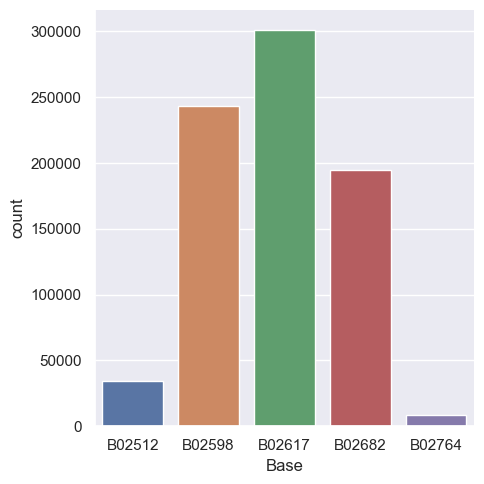

In [23]:
# total rides based on base codes
sns.catplot(x='Base', data=Uber, kind='count')

<AxesSubplot: title={'center': 'Hourly Journeys'}, xlabel='HourofDay'>

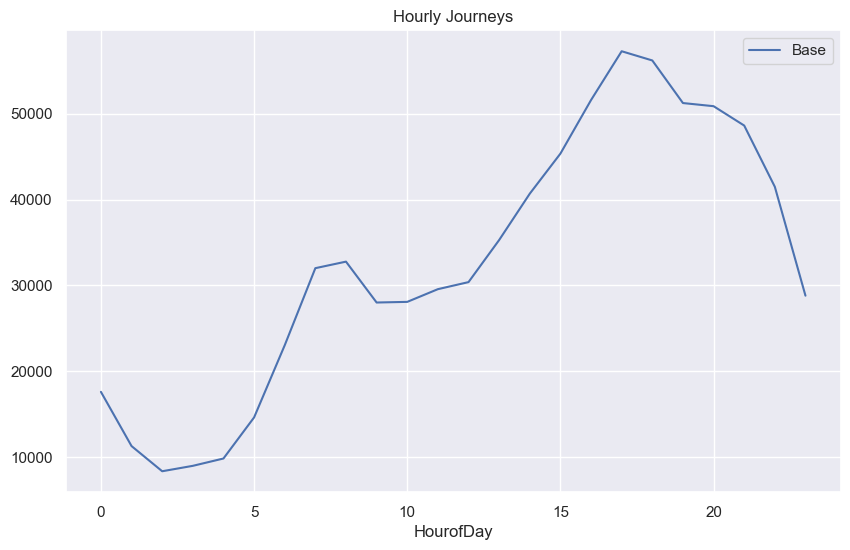

In [26]:
Uber_hourly_data = Uber.pivot_table(index=['HourofDay'], values='Base', aggfunc='count')
Uber_hourly_data.plot(kind='line', figsize=(10,6), title='Hourly Journeys')

<AxesSubplot: title={'center': 'Journeys by DayNum'}, xlabel='DayNum'>

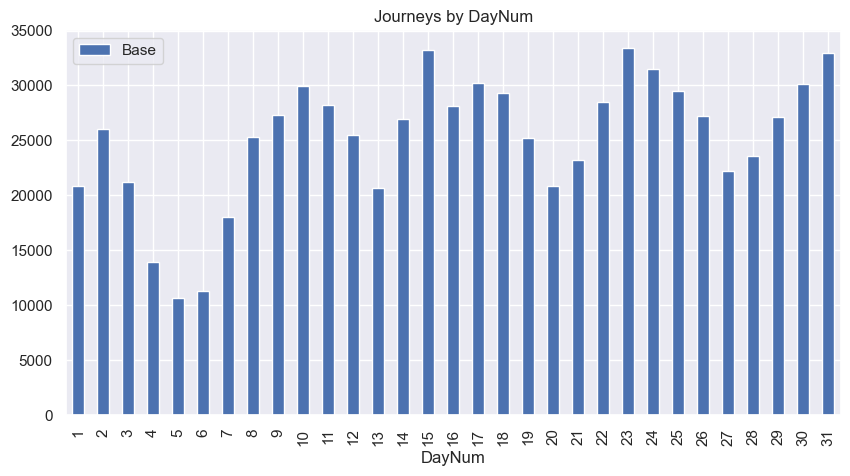

In [28]:
Uber_day_data = Uber.pivot_table(index=['DayNum'], values='Base', aggfunc='count') #creating a pivot table
Uber_day_data.plot(kind='bar', figsize=(10,5), title='Journeys by DayNum')              #plotting the pivot table

In [29]:
def count_rows(rows):
    return len(rows)
by_date = Uber.groupby('DayNum').apply(count_rows)
by_date

DayNum
1     20875
2     26040
3     21208
4     13921
5     10693
6     11253
7     18014
8     25320
9     27308
10    29974
11    28243
12    25488
13    20707
14    26923
15    33191
16    28100
17    30213
18    29354
19    25256
20    20820
21    23196
22    28456
23    33367
24    31455
25    29469
26    27189
27    22196
28    23539
29    27126
30    30134
31    32941
dtype: int64

In [32]:
#sorting day of the month by values
by_date_sort=by_date.sort_values()
by_date_sort

DayNum
5     10693
6     11253
4     13921
7     18014
13    20707
20    20820
1     20875
3     21208
27    22196
21    23196
28    23539
19    25256
8     25320
12    25488
2     26040
14    26923
29    27126
26    27189
9     27308
16    28100
11    28243
22    28456
18    29354
25    29469
10    29974
30    30134
17    30213
24    31455
31    32941
15    33191
23    33367
dtype: int64

In [38]:
 #plotting a histogram to show relationships between the trips and days
hist(Uber.HourOfDay, bins=24, range=(.5, 24))

In [39]:
#it shows the relationship between the day, hour aand trips
count_rows(Uber)
by_hour_weekday = Uber.groupby('HourofDay DayofWeekNum'.split()).apply(count_rows).unstack()
by_hour_weekday


DayofWeekNum,0,1,2,3,4,5,6
HourofDay,,,,,,,
0,1238,1476,1740,2104,2407,4368,4285
1,600,763,938,1136,1510,3092,3268
2,429,540,757,833,1029,2279,2512
3,998,915,1094,1257,1202,1673,1870
4,1583,1450,1603,1852,1333,1072,969
5,2408,2672,2754,2876,1942,1078,911
6,3574,4715,4925,4706,2903,1198,1018
7,4994,6628,6998,6596,3981,1568,1244
8,4713,6532,6989,6572,4083,2056,1825


<AxesSubplot: xlabel='DayofWeekNum', ylabel='HourofDay'>

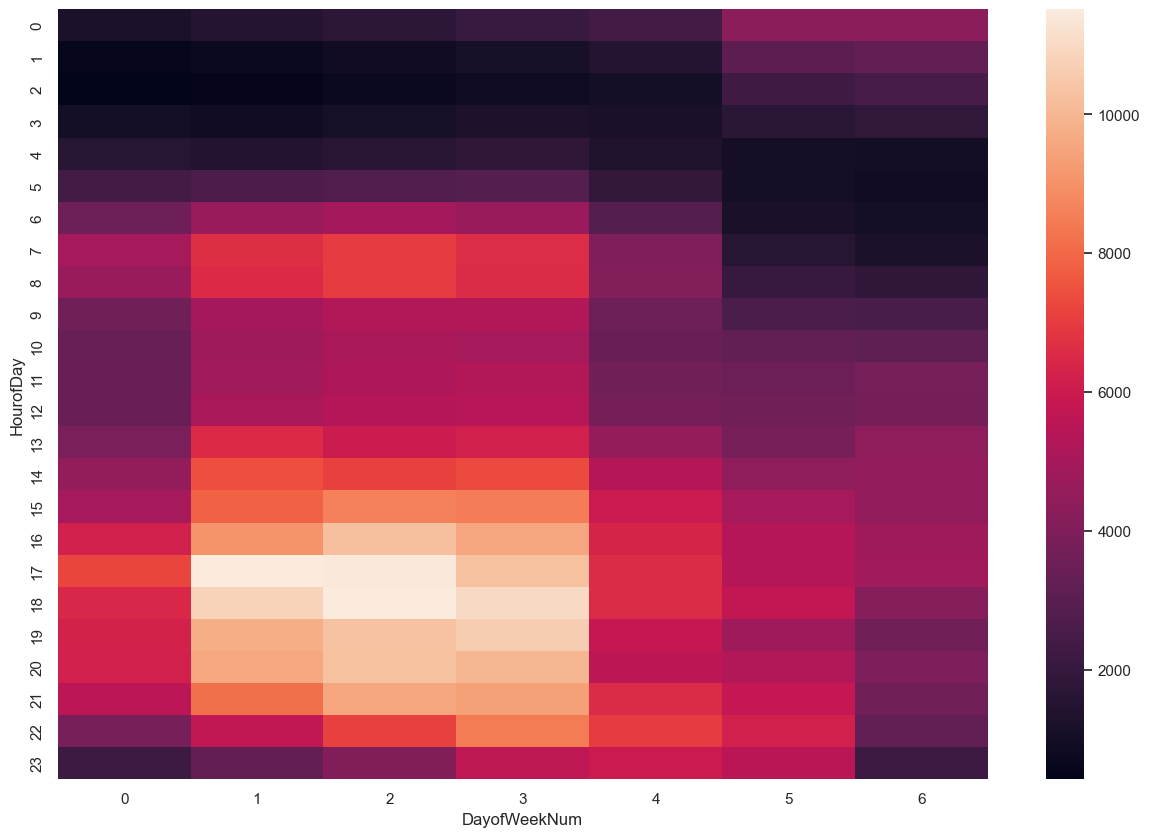

In [40]:
    #heat map to analyze bookings interms of hour of the day
    plt.figure(figsize=(15,10))
    sns.heatmap(by_hour_weekday)
    #the dark regions saw the least number of trips, then the bright regions saw the highest number of trips
    #we can conclusively say that 5pm on wednesday saw the highest number of trips.